<a href="https://colab.research.google.com/github/alimoorreza/cs195-fall24-notes/blob/main/cs195_vision_transformer_ViT_dissection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS195: Day10

### CS195: Computer Vision, Fall 2024

Monday, September 30th, 2024

📆 [Course Schedule](https://analytics.drake.edu/~reza/teaching/cs195_fall24/cs195_schedule.html) | 📜 [Syllabus](https://analytics.drake.edu/~reza/teaching/cs195_fall24/cs195_syllabus_sp24.pdf)


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import json
import numpy as np

# util function:
def get_imagenet_mean_std_normalized():
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
    return mean, std

def load_json_file(file_path):

  data = {}
  with open(file_path, 'r') as file:
    data = json.load(file)

  return data

def write_json_file(file_path):

  data = {}
  with open(file_path, 'w') as file:
    data = json.dump(data, file)

  return data

# **Creating Vision Transformer (ViT) network architecture**
> ## **Loading model's pretrained weights from PyTorch library**

In [ ]:
import torch
import torch.nn as nn
from torchvision import models

import PIL
from PIL import Image
import json
import torchvision
import torchvision.transforms as T

import sys
import matplotlib.pyplot as plt
import scipy.io
import os

import pdb

from torchvision import transforms, datasets

# You can give any name to your new network, e.g., ViT.
# You should load the pretrained ViT model from torchvision.models.
# This model was trained on over a million real-world images from ImageNet.


class ViT(nn.Module):

    def __init__(self, num_classes, pretrained=True):

        super(ViT, self).__init__()

        # download PyTorch's own implementation of Vision Transformer model trained on ImageNet dataset
        net             = models.vit_b_16(pretrained=True)
        self.net        = net

        '''
        net             = models.vit_b_32(pretrained=True)
        net             = models.vit_l_16(pretrained=True)
        net             = models.vit_l_32(pretrained=True)
        net             = models.vit_h_14(pretrained=True)
        '''

        # IMPORTANT: "If you need to fine-tune this network for your own dataset,
        # the simplest modification is to replace the last layer in self.classifier with
        # the updated ViT has the desired number of output classes: 'num_classes'
        # self.classifier[-1] = nn.Linear(4096, num_classes) # only this last layer's weights will be trained from scratch


    def forward(self, x):

      #pdb.set_trace()
      print("shape of input: ", x.shape)
      output = self.net(x)
      print("output shape (self.classifier): ", output.shape)
      return output


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("device = ", device)
number_of_classes = 1000
model             = ViT(number_of_classes)
model.to(device)


device =  cpu


ViT(
  (net): VisionTransformer(
    (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    (encoder): Encoder(
      (dropout): Dropout(p=0.0, inplace=False)
      (layers): Sequential(
        (encoder_layer_0): EncoderBlock(
          (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
          (self_attention): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          )
          (dropout): Dropout(p=0.0, inplace=False)
          (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
          (mlp): MLPBlock(
            (0): Linear(in_features=768, out_features=3072, bias=True)
            (1): GELU(approximate='none')
            (2): Dropout(p=0.0, inplace=False)
            (3): Linear(in_features=3072, out_features=768, bias=True)
            (4): Dropout(p=0.0, inplace=False)
          )
        )
        (encoder_layer_1): EncoderBlock(
          (ln_1): LayerNorm((76

# **Doing single forward pass on Vision Transformer (ViT) using a sample image**

In [ ]:
TEST_IMAGE_SIZE_W = 224 # notice that Vision Transformer (ViT) pretrained model from torchvision expects the size of the image to be 224x224
TEST_IMAGE_SIZE_H = 224 # notice that Vision Transformer (ViT) pretrained model from torchvision expects the size of the image to be 224x224

file_path         = '/content/drive/MyDrive/cs195_fall24/classification/imagenet_1000_classes.json'
label_map         = load_json_file(file_path)
mean, std         = get_imagenet_mean_std_normalized()
print(label_map)
print(f"ImageNet: mean: {mean}, std: {std}")

# ViT transformer just like other CNN architectures such as AlexNet, VGGNet, and ResNet has been pre-trained using the ImageNet dataset.
# You need to normalize each image with the given mean and standard deviation before doing the forward-pass on these networks.
transform = transforms.Compose([
    transforms.Resize((TEST_IMAGE_SIZE_W, TEST_IMAGE_SIZE_H)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std) # ImageNet: mean (R, G, B) and standard deviation (R, G, B)
])



{'0': 'tench, Tinca tinca', '1': 'goldfish, Carassius auratus', '2': 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias', '3': 'tiger shark, Galeocerdo cuvieri', '4': 'hammerhead, hammerhead shark', '5': 'electric ray, crampfish, numbfish, torpedo', '6': 'stingray', '7': 'cock', '8': 'hen', '9': 'ostrich, Struthio camelus', '10': 'brambling, Fringilla montifringilla', '11': 'goldfinch, Carduelis carduelis', '12': 'house finch, linnet, Carpodacus mexicanus', '13': 'junco, snowbird', '14': 'indigo bunting, indigo finch, indigo bird, Passerina cyanea', '15': 'robin, American robin, Turdus migratorius', '16': 'bulbul', '17': 'jay', '18': 'magpie', '19': 'chickadee', '20': 'water ouzel, dipper', '21': 'kite', '22': 'bald eagle, American eagle, Haliaeetus leucocephalus', '23': 'vulture', '24': 'great grey owl, great gray owl, Strix nebulosa', '25': 'European fire salamander, Salamandra salamandra', '26': 'common newt, Triturus vulgaris', '27': 'eft', '28': '

### **Run the pretrained model on a random image to test its classification ability**
> I have uploaded the images of `cat,` `dog,` and `bike` to Blackboard.

> You can download those images and upload them to your workspace. Alternatively, you can download random images of a `cat,` `dog,` or `any other class of your choice` and test them using ViT.


In [ ]:
img = PIL.Image.open('/content/drive/MyDrive/cs195_fall24/classification/inference_img/random_dog1.jpg')
#img = PIL.Image.open('/content/drive/MyDrive/cs195_fall24/classification/inference_img/random_dog2.jpg')
#img = PIL.Image.open('/content/drive/MyDrive/cs195_fall24/classification/inference_img/random_cat1.jpg')
#img = PIL.Image.open('/content/drive/MyDrive/cs195_fall24/classification/inference_img/random_cat2.jpg')
#img = PIL.Image.open('/content/drive/MyDrive/cs195_fall24/classification/inference_img/random_bike1.jpg')


print(f"shape of img: {img.size}")


shape of img: (800, 534)


In [ ]:
img_tensor          = transform(img).unsqueeze(0).to(device)
raw_output          = model(img_tensor)
output_prob         = torch.softmax(raw_output, dim=1)
output_prob_numpy   = output_prob.data.numpy()[0]

print(f"Sum of all predicted probabilities: {np.sum(output_prob_numpy)}")
print(f"Probability of class-0: {output_prob_numpy[0]}")

# results after the completion of the forward pass through ViT
#print(f"raw probability: {output_prob}")
print(f"label map: {label_map}")
K             = 10
topk          = torch.topk(output_prob, k=K)
topk_prob     = topk.values[0]
topk_indices  = topk.indices[0]
topk_indices  = topk_indices.data.numpy()
print(f"top4_classes are as follow: \n{topk_indices}")
labels        = "{:75s}".format("predicted label from ViT")
prob          = "{}".format("probability")
print("\n{:75s}".format("--------------------------------------------------------------------------------------\n"), labels, prob,"\n{:75s}".format("--------------------------------------------------------------------------------------"))

for i in range(K):
    labels  = label_map[str(topk_indices[i])]
    labels  = "{:75s}".format(labels)
    prob    = "{:.4f}".format(float(topk_prob[i]))
    print(labels, prob)

print("{:75s}".format("--------------------------------------------------------------------------------------"))
plt.imshow(img)


#**Group task#2**
> **Task#1: Try at least one more variant of the ViT pretrained model from torchvision.**
>> [Reference ViT-Base: vit_b_32]()

>> [Reference ViT-Large: vit_l_16]()

>> [Reference ViT-Large: vit_l_32]()



In [ ]:
# your network code
# ...
# ...
# ...

device =  cpu


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_L_32_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_L_32_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ViT(
  (net): VisionTransformer(
    (conv_proj): Conv2d(3, 1024, kernel_size=(32, 32), stride=(32, 32))
    (encoder): Encoder(
      (dropout): Dropout(p=0.0, inplace=False)
      (layers): Sequential(
        (encoder_layer_0): EncoderBlock(
          (ln_1): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
          (self_attention): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=1024, out_features=1024, bias=True)
          )
          (dropout): Dropout(p=0.0, inplace=False)
          (ln_2): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
          (mlp): MLPBlock(
            (0): Linear(in_features=1024, out_features=4096, bias=True)
            (1): GELU(approximate='none')
            (2): Dropout(p=0.0, inplace=False)
            (3): Linear(in_features=4096, out_features=1024, bias=True)
            (4): Dropout(p=0.0, inplace=False)
          )
        )
        (encoder_layer_1): EncoderBlock(
          (ln_1): LayerN

> ### **Task 2: Run the pretrained model on a random image to test its classification ability**

> Essentially, repeat the experiment we did earlier.


In [ ]:
# your remaining code for forward pass
# ...
# ...
# ...




> ### **Task 3: Summarize your observations and discuss them with your group members.**

>> Is it doing better than `vit_b_16()` model?



##**your answer**


#**Group task#2**
> ### **How would you modify your ViT so that it can fine-tuned for 21 class classification problem?**

>> Hint: you may need to replace the last layer of your `self.net.heads.head` with a `nn.Linear()`

>> only this last layer's weights will be trained from scratch

In [ ]:
# your network code
# ...
# ...
# ...

device =  cpu


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_B_16_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_B_16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ViT(
  (net): VisionTransformer(
    (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    (encoder): Encoder(
      (dropout): Dropout(p=0.0, inplace=False)
      (layers): Sequential(
        (encoder_layer_0): EncoderBlock(
          (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
          (self_attention): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          )
          (dropout): Dropout(p=0.0, inplace=False)
          (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
          (mlp): MLPBlock(
            (0): Linear(in_features=768, out_features=3072, bias=True)
            (1): GELU(approximate='none')
            (2): Dropout(p=0.0, inplace=False)
            (3): Linear(in_features=3072, out_features=768, bias=True)
            (4): Dropout(p=0.0, inplace=False)
          )
        )
        (encoder_layer_1): EncoderBlock(
          (ln_1): LayerNorm((76

shape of input:  torch.Size([1, 3, 224, 224])
output shape (self.classifier):  torch.Size([1, 21])
Sum of all predicted probabilities: 1.0
Probability of class-0: 0.04200541973114014
label map: {'0': 'tench, Tinca tinca', '1': 'goldfish, Carassius auratus', '2': 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias', '3': 'tiger shark, Galeocerdo cuvieri', '4': 'hammerhead, hammerhead shark', '5': 'electric ray, crampfish, numbfish, torpedo', '6': 'stingray', '7': 'cock', '8': 'hen', '9': 'ostrich, Struthio camelus', '10': 'brambling, Fringilla montifringilla', '11': 'goldfinch, Carduelis carduelis', '12': 'house finch, linnet, Carpodacus mexicanus', '13': 'junco, snowbird', '14': 'indigo bunting, indigo finch, indigo bird, Passerina cyanea', '15': 'robin, American robin, Turdus migratorius', '16': 'bulbul', '17': 'jay', '18': 'magpie', '19': 'chickadee', '20': 'water ouzel, dipper', '21': 'kite', '22': 'bald eagle, American eagle, Haliaeetus leucocephalu

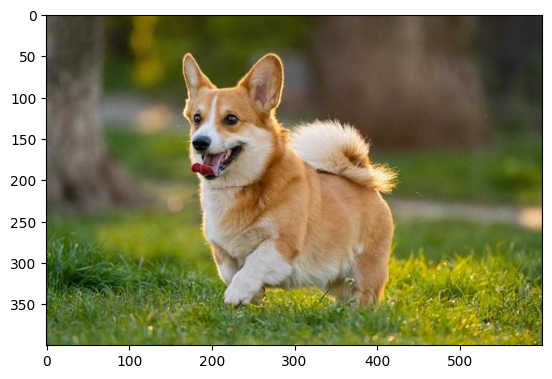

In [ ]:
# remaining forward pass code
# ...
# ...
# ...


#**Group task#3**
> ### **Change the network layout to SwinFormer (another variant of Vision Transformer) and rerun the experiment for 1000 class classification problem.**
> [Reference: SwinFormer Tiny](https://pytorch.org/vision/main/models/generated/torchvision.models.swin_v2_t.html#torchvision.models.swin_v2_t)

> Define the network

In [ ]:
# your network code
# ...
# ...
# ...


device =  cpu


SwinFormerTiny(
  (net): SwinTransformer(
    (features): Sequential(
      (0): Sequential(
        (0): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
        (1): Permute()
        (2): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
      )
      (1): Sequential(
        (0): SwinTransformerBlockV2(
          (norm1): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
          (attn): ShiftedWindowAttentionV2(
            (qkv): Linear(in_features=96, out_features=288, bias=True)
            (proj): Linear(in_features=96, out_features=96, bias=True)
            (cpb_mlp): Sequential(
              (0): Linear(in_features=2, out_features=512, bias=True)
              (1): ReLU(inplace=True)
              (2): Linear(in_features=512, out_features=3, bias=False)
            )
          )
          (stochastic_depth): StochasticDepth(p=0.0, mode=row)
          (norm2): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
          (mlp): MLP(
            (0): Linear(in_featur

> Do the forward pass through SwinFormerTiny using an image

shape of input:  torch.Size([1, 3, 224, 224])
output shape (self.classifier):  torch.Size([1, 1000])
Sum of all predicted probabilities: 0.9999998807907104
Probability of class-0: 8.432809408986941e-05
label map: {'0': 'tench, Tinca tinca', '1': 'goldfish, Carassius auratus', '2': 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias', '3': 'tiger shark, Galeocerdo cuvieri', '4': 'hammerhead, hammerhead shark', '5': 'electric ray, crampfish, numbfish, torpedo', '6': 'stingray', '7': 'cock', '8': 'hen', '9': 'ostrich, Struthio camelus', '10': 'brambling, Fringilla montifringilla', '11': 'goldfinch, Carduelis carduelis', '12': 'house finch, linnet, Carpodacus mexicanus', '13': 'junco, snowbird', '14': 'indigo bunting, indigo finch, indigo bird, Passerina cyanea', '15': 'robin, American robin, Turdus migratorius', '16': 'bulbul', '17': 'jay', '18': 'magpie', '19': 'chickadee', '20': 'water ouzel, dipper', '21': 'kite', '22': 'bald eagle, American eagle, Hali

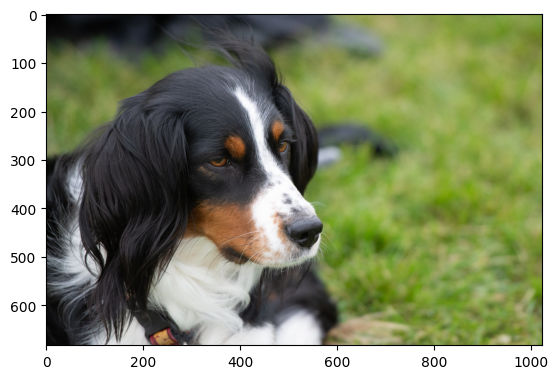

In [ ]:
# your code
# ...
# ...
# ...


#**Group task#4**
> ### **How would you modify your SwinFormerTiny so that it can fine-tuned for 21 class classification problem?**

>> Hint: you may need to replace the last layer of your `self.net.heads.head` with a `nn.Linear()`

>> only this last layer's weights will be trained from scratch

In [ ]:
# your code
# ...
# ...
# ...


device =  cpu


SwinFormerTiny(
  (net): SwinTransformer(
    (features): Sequential(
      (0): Sequential(
        (0): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
        (1): Permute()
        (2): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
      )
      (1): Sequential(
        (0): SwinTransformerBlockV2(
          (norm1): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
          (attn): ShiftedWindowAttentionV2(
            (qkv): Linear(in_features=96, out_features=288, bias=True)
            (proj): Linear(in_features=96, out_features=96, bias=True)
            (cpb_mlp): Sequential(
              (0): Linear(in_features=2, out_features=512, bias=True)
              (1): ReLU(inplace=True)
              (2): Linear(in_features=512, out_features=3, bias=False)
            )
          )
          (stochastic_depth): StochasticDepth(p=0.0, mode=row)
          (norm2): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
          (mlp): MLP(
            (0): Linear(in_featur